###  Image Classification and Recognition using PCA and SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

%matplotlib inline

In [3]:
#pip install scikit-image

In [4]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
actor1=os.listdir('vijay')

In [6]:
actor2=os.listdir('surya')

In [7]:
actor3=os.listdir('dhanush')

###  Reading image as matrix of numbers

In [8]:
#C:\Users\ADMIN\Machine learning basics\vijay

In [11]:
limit=10
vijay=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        vijay[j]=imread('C:/Users/ADMIN/Machine learning basics/vijay/'+i)
        j+=1
    else:
        break
        
        

In [12]:
surya=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        surya[j]=imread('C:/Users/ADMIN/Machine learning basics/surya/'+i)
        j+=1
    else:
        break

In [13]:
dhanush=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        dhanush[j]=imread('C:/Users/ADMIN/Machine learning basics/dhanush/'+i)
        j+=1
    else:
        break

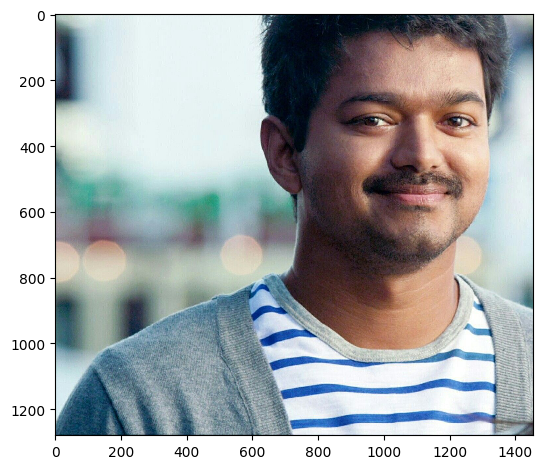

In [14]:
imshow(vijay[3])

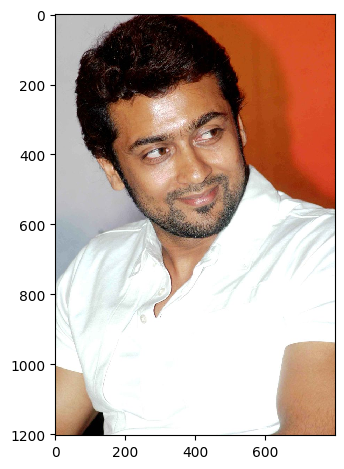

In [15]:
imshow(surya[9])

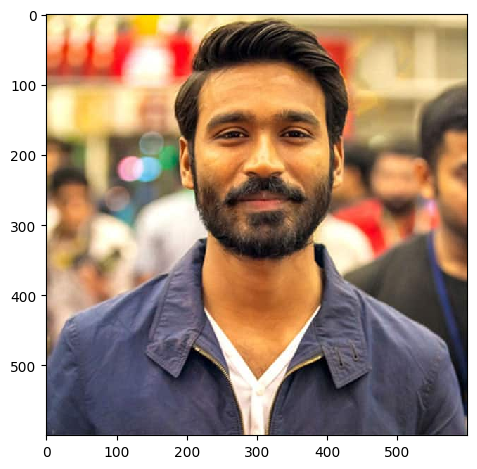

In [16]:
imshow(dhanush[3])

### Covert into greyscale

In [17]:
vijay_grey=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        vijay_grey[j]=rgb2gray(vijay[j])
        j+=1
    else:
        break

In [18]:
surya_grey=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        surya_grey[j]=rgb2gray(surya[j])
        j+=1
    else:
        break

In [19]:
dhanush_grey=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        dhanush_grey[j]=rgb2gray(dhanush[j])
        j+=1
    else:
        break

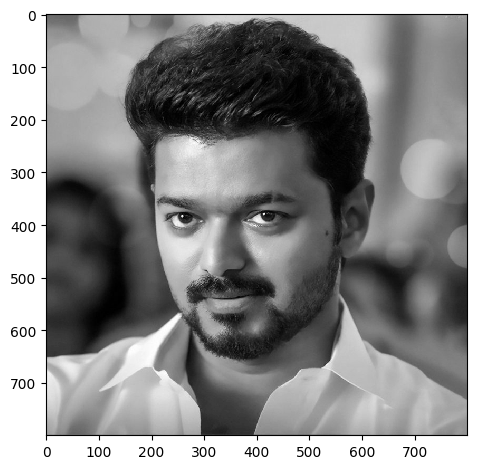

In [20]:
imshow(vijay_grey[4])

###  Matrix Resizing

In [21]:
for j in range(10):
    ce=vijay_grey[j]
    vijay_grey[j]=resize(ce,(500,500))

In [22]:
for j in range(10):
    cm=surya_grey[j]
    surya_grey[j]=resize(cm,(500,500))

In [23]:
for j in range(10):
    th=dhanush_grey[j]
    dhanush_grey[j]=resize(th,(500,500))

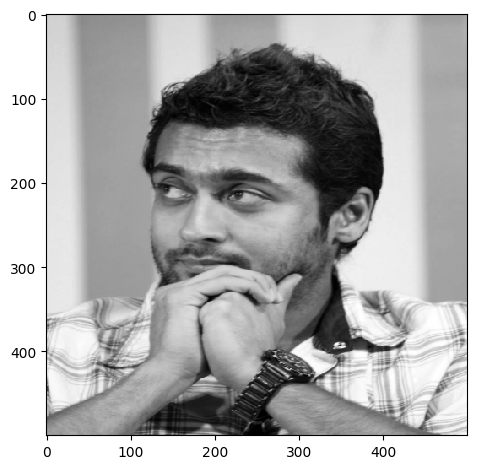

In [24]:
imshow(surya_grey[3])

### Flatten the image

In [25]:
image_size_vijay=vijay_grey[2].shape
image_size_vijay

(500, 500)

In [26]:
image_size_surya=surya_grey[2].shape
image_size_surya

(500, 500)

In [27]:
image_size_dhanush=dhanush_grey[2].shape
image_size_dhanush

(500, 500)

In [28]:
flatten_size_vijay=image_size_vijay[0]*image_size_vijay[1]
flatten_size_vijay

250000

In [29]:
flatten_size_surya=image_size_surya[0]*image_size_surya[1]
flatten_size_surya

250000

In [30]:
flatten_size_dhanush=image_size_dhanush[0]*image_size_dhanush[1]
flatten_size_dhanush

250000

In [31]:
length_of_images_vijay=len(vijay_grey)
length_of_images_vijay

10

In [32]:
length_of_images_surya=len(surya_grey)
length_of_images_surya

10

In [33]:
length_of_images_dhanush=len(dhanush_grey)
length_of_images_dhanush

10

In [34]:
for i in range(length_of_images_vijay):
    vijay_grey[i]=np.ndarray.flatten(vijay_grey[i]).reshape(flatten_size_vijay,1)

In [35]:
for i in range(length_of_images_surya):
    surya_grey[i]=np.ndarray.flatten(surya_grey[i]).reshape(flatten_size_surya,1)

In [36]:
for i in range(length_of_images_dhanush):
    dhanush_grey[i]=np.ndarray.flatten(dhanush_grey[i]).reshape(flatten_size_dhanush,1)

### Stack the array

In [37]:
vijay_grey=np.dstack(vijay_grey)
vijay_grey.shape

(250000, 1, 10)

In [38]:
surya_grey=np.dstack(surya_grey)
surya_grey.shape

(250000, 1, 10)

In [39]:
dhanush_grey=np.dstack(dhanush_grey)
dhanush_grey.shape

(250000, 1, 10)

In [40]:
vijay_grey=np.rollaxis(vijay_grey,axis=2,start=0)
vijay_grey.shape

(10, 250000, 1)

In [41]:
surya_grey=np.rollaxis(surya_grey,axis=2,start=0)
surya_grey.shape

(10, 250000, 1)

In [42]:
dhanush_grey=np.rollaxis(dhanush_grey,axis=2,start=0)
dhanush_grey.shape

(10, 250000, 1)

In [43]:
vijay_grey=vijay_grey.reshape(length_of_images_vijay,flatten_size_vijay)
vijay_grey.shape

(10, 250000)

In [44]:
surya_grey=surya_grey.reshape(length_of_images_surya,flatten_size_surya)
surya_grey.shape

(10, 250000)

In [45]:
dhanush_grey=dhanush_grey.reshape(length_of_images_dhanush,flatten_size_dhanush)
dhanush_grey.shape

(10, 250000)

In [46]:
vijay_data=pd.DataFrame(vijay_grey)
vijay_data['label']='vijay'
vijay_data

0         1         2         3         4         5         6  \
0  0.712022  0.712022  0.712022  0.712022  0.712022  0.712022  0.712022   
1  0.728743  0.728743  0.728743  0.728743  0.728743  0.728743  0.728743   
2  0.690798  0.689817  0.693639  0.695986  0.696561  0.697890  0.699207   
3  0.733585  0.749809  0.763451  0.773051  0.771425  0.788122  0.779082   
4  0.413583  0.423290  0.418131  0.409102  0.411407  0.411958  0.411949   
5  0.483099  0.497217  0.516346  0.530164  0.542187  0.556391  0.568276   
6  0.130911  0.132370  0.134753  0.134822  0.134822  0.135224  0.138516   
7  0.244781  0.244495  0.244272  0.244450  0.248812  0.252053  0.257463   
8  0.883737  0.885016  0.882143  0.888805  0.890836  0.892742  0.891213   
9  0.287579  0.287579  0.287579  0.287579  0.287601  0.290669  0.290922   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.712202  0.712305  0.712305  ...  0.184814  0.187640  0.195095  0.201114   
1  0.728743  0.728743  0.728743  ...  0.938242  0.932644  0.935932  0.937010   
2  0.697675  0.702401  0.699656  ...  0.077506  0.083280  0.080989  0.083497   
3  0.793065  0.788465  0.803212  ...  0.363904  0.328572  0.306389  0.289404   
4  0.408641  0.408037  0.408047  ...  0.561815  0.555176  0.548272  0.549421   
5  0.577162  0.586152  0.594609  ...  0.039468  0.039468  0.039468  0.039468   
6  0.138743  0.138743  0.138743  ...  0.167599  0.170232  0.166940  0.147905   
7  0.261487  0.264885  0.273006  ...  0.699599  0.751003  0.795424  0.810885   
8  0.889397  0.891942  0.904798  ...  0.170686  0.026958  0.026467  0.105632   
9  0.288373  0.282091  0.288749  ...  0.378582  0.465186  0.763092  0.848039   

     249995    249996    249997    249998    249999  label  
0  0.207158  0.209062  0.209267  0.209267  0.209267  vijay  
1  0.933563  0.948451  0.941967  0.935763  0.933837  vijay  
2  0.086023  0.089920  0.089370  0.095137  0.096900  vijay  
3  0.268751  0.260208  0.262798  0.251410  0.233498  vijay  
4  0.557570  0.554044  0.554195  0.551227  0.542271  vijay  
5  0.039468  0.039468  0.039468  0.039468  0.039468  vijay  
6  0.071829  0.154768  0.165071  0.162822  0.164579  vijay  
7  0.823997  0.829755  0.842230  0.844181  0.845194  vijay  
8  0.168810  0.071530  0.072704  0.317553  0.432341  vijay  
9  0.842463  0.851485  0.855711  0.852019  0.869387  vijay  

[10 rows x 250001 columns]

In [47]:
surya_data=pd.DataFrame(surya_grey)
surya_data['label']='surya'
surya_data

0         1         2         3         4         5         6  \
0  0.679219  0.672255  0.664436  0.659013  0.653373  0.646160  0.635081   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.548426  0.547643  0.546043  0.544596  0.546649  0.547643  0.541125   
3  0.807999  0.808430  0.811905  0.810844  0.810765  0.812777  0.811674   
4  0.499557  0.479328  0.485783  0.478090  0.482074  0.481812  0.480626   
5  0.621191  0.619174  0.615839  0.614888  0.617451  0.617553  0.617553   
6  0.381041  0.377124  0.371667  0.367750  0.366346  0.370263  0.375720   
7  0.161886  0.162621  0.156452  0.147000  0.144893  0.136643  0.134856   
8  0.360181  0.360133  0.361113  0.365427  0.367976  0.363690  0.355119   
9  0.756863  0.756863  0.756863  0.756863  0.756863  0.756863  0.756836   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.625611  0.621683  0.610349  ...  0.544881  0.711314  0.790596  0.807039   
1  1.000000  1.000000  1.000000  ...  0.156003  0.155953  0.156427  0.151548   
2  0.549073  0.561781  0.554424  ...  0.992157  0.992157  0.991601  0.988708   
3  0.811667  0.811629  0.803431  ...  0.932559  0.940394  0.946537  0.953345   
4  0.480310  0.480807  0.485261  ...  0.255510  0.256704  0.249417  0.273901   
5  0.617881  0.620620  0.620656  ...  0.426846  0.428147  0.434215  0.431307   
6  0.379637  0.387481  0.384752  ...  0.161947  0.151668  0.151250  0.156443   
7  0.121546  0.119831  0.115671  ...  0.985225  0.964466  0.553538  0.189066   
8  0.355256  0.352921  0.348664  ...  0.087207  0.083561  0.076435  0.072316   
9  0.754593  0.752938  0.752914  ...  0.569507  0.554121  0.540810  0.500861   

     249995    249996    249997    249998    249999  label  
0  0.810574  0.807028  0.756840  0.699245  0.727956  surya  
1  0.146999  0.153112  0.153895  0.146592  0.134466  surya  
2  0.988451  0.992157  0.992157  0.992157  0.992157  surya  
3  0.956135  0.955219  0.952180  0.952422  0.948585  surya  
4  0.357166  0.243146  0.238140  0.227575  0.280654  surya  
5  0.431671  0.432985  0.438059  0.410770  0.423019  surya  
6  0.167393  0.163433  0.163737  0.162799  0.159820  surya  
7  0.161126  0.142613  0.107984  0.106646  0.122654  surya  
8  0.064960  0.061018  0.061247  0.066273  0.074519  surya  
9  0.525777  0.487021  0.495318  0.506715  0.466908  surya  

[10 rows x 250001 columns]

In [48]:
dhanush_data=pd.DataFrame(dhanush_grey)
dhanush_data['label']='dhanush'
dhanush_data

0         1         2         3         4         5         6  \
0  0.163031  0.163031  0.163031  0.163124  0.169110  0.145302  0.146353   
1  0.547629  0.537369  0.536150  0.545236  0.542664  0.531594  0.531654   
2  0.121674  0.121937  0.120675  0.114199  0.122731  0.150203  0.139240   
3  0.817553  0.812718  0.809309  0.811115  0.818367  0.829259  0.831318   
4  0.329675  0.295854  0.294235  0.300153  0.284963  0.278313  0.283456   
5  0.047815  0.045288  0.047647  0.050960  0.050421  0.050390  0.046935   
6  0.125908  0.124268  0.123034  0.120195  0.120280  0.118286  0.118307   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.272600  0.264839  0.263119  0.266436  0.272069  0.270883  0.268529   
9  0.701054  0.701044  0.700995  0.701027  0.701072  0.700909  0.701672   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.135162  0.124452  0.121635  ...  0.289619  0.308535  0.464010  0.960792   
1  0.538767  0.539234  0.527034  ...  0.667766  0.640113  0.609284  0.624443   
2  0.132834  0.143611  0.148432  ...  0.249425  0.261138  0.258098  0.258443   
3  0.825563  0.836200  0.854041  ...  0.338487  0.350644  0.354061  0.354262   
4  0.280661  0.290734  0.291152  ...  0.872217  0.872191  0.877378  0.867363   
5  0.046150  0.049718  0.053471  ...  0.235306  0.263684  0.586585  0.345565   
6  0.119564  0.119179  0.121930  ...  0.067675  0.065222  0.060932  0.059674   
7  0.000000  0.000000  0.000000  ...  0.406837  0.425532  0.419159  0.392021   
8  0.267981  0.272563  0.269858  ...  0.108308  0.115961  0.117904  0.118712   
9  0.701423  0.697720  0.701727  ...  0.448216  0.504340  0.531274  0.645607   

     249995    249996    249997    249998    249999    label  
0  0.727203  0.266089  0.248568  0.276590  0.299108  dhanush  
1  0.578255  0.524103  0.559340  0.565181  0.565446  dhanush  
2  0.251433  0.239866  0.230426  0.229809  0.229809  dhanush  
3  0.376748  0.410720  0.462189  0.572363  0.703817  dhanush  
4  0.836083  0.808870  0.790256  0.778160  0.771595  dhanush  
5  0.574662  0.767586  0.530026  0.382901  0.589952  dhanush  
6  0.054407  0.053892  0.050997  0.050981  0.050980  dhanush  
7  0.415883  0.447993  0.437929  0.392963  0.027512  dhanush  
8  0.115463  0.121281  0.146158  0.148190  0.123128  dhanush  
9  0.648930  0.535295  0.555782  0.538128  0.477303  dhanush  

[10 rows x 250001 columns]

In [49]:
actor_1=pd.concat([vijay_data,surya_data])

In [50]:
actor=pd.concat([dhanush_data,actor_1])
actor

0         1         2         3         4         5         6  \
0  0.163031  0.163031  0.163031  0.163124  0.169110  0.145302  0.146353   
1  0.547629  0.537369  0.536150  0.545236  0.542664  0.531594  0.531654   
2  0.121674  0.121937  0.120675  0.114199  0.122731  0.150203  0.139240   
3  0.817553  0.812718  0.809309  0.811115  0.818367  0.829259  0.831318   
4  0.329675  0.295854  0.294235  0.300153  0.284963  0.278313  0.283456   
5  0.047815  0.045288  0.047647  0.050960  0.050421  0.050390  0.046935   
6  0.125908  0.124268  0.123034  0.120195  0.120280  0.118286  0.118307   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.272600  0.264839  0.263119  0.266436  0.272069  0.270883  0.268529   
9  0.701054  0.701044  0.700995  0.701027  0.701072  0.700909  0.701672   
0  0.712022  0.712022  0.712022  0.712022  0.712022  0.712022  0.712022   
1  0.728743  0.728743  0.728743  0.728743  0.728743  0.728743  0.728743   
2  0.690798  0.689817  0.693639  0.695986  0.696561  0.697890  0.699207   
3  0.733585  0.749809  0.763451  0.773051  0.771425  0.788122  0.779082   
4  0.413583  0.423290  0.418131  0.409102  0.411407  0.411958  0.411949   
5  0.483099  0.497217  0.516346  0.530164  0.542187  0.556391  0.568276   
6  0.130911  0.132370  0.134753  0.134822  0.134822  0.135224  0.138516   
7  0.244781  0.244495  0.244272  0.244450  0.248812  0.252053  0.257463   
8  0.883737  0.885016  0.882143  0.888805  0.890836  0.892742  0.891213   
9  0.287579  0.287579  0.287579  0.287579  0.287601  0.290669  0.290922   
0  0.679219  0.672255  0.664436  0.659013  0.653373  0.646160  0.635081   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.548426  0.547643  0.546043  0.544596  0.546649  0.547643  0.541125   
3  0.807999  0.808430  0.811905  0.810844  0.810765  0.812777  0.811674   
4  0.499557  0.479328  0.485783  0.478090  0.482074  0.481812  0.480626   
5  0.621191  0.619174  0.615839  0.614888  0.617451  0.617553  0.617553   
6  0.381041  0.377124  0.371667  0.367750  0.366346  0.370263  0.375720   
7  0.161886  0.162621  0.156452  0.147000  0.144893  0.136643  0.134856   
8  0.360181  0.360133  0.361113  0.365427  0.367976  0.363690  0.355119   
9  0.756863  0.756863  0.756863  0.756863  0.756863  0.756863  0.756836   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.135162  0.124452  0.121635  ...  0.289619  0.308535  0.464010  0.960792   
1  0.538767  0.539234  0.527034  ...  0.667766  0.640113  0.609284  0.624443   
2  0.132834  0.143611  0.148432  ...  0.249425  0.261138  0.258098  0.258443   
3  0.825563  0.836200  0.854041  ...  0.338487  0.350644  0.354061  0.354262   
4  0.280661  0.290734  0.291152  ...  0.872217  0.872191  0.877378  0.867363   
5  0.046150  0.049718  0.053471  ...  0.235306  0.263684  0.586585  0.345565   
6  0.119564  0.119179  0.121930  ...  0.067675  0.065222  0.060932  0.059674   
7  0.000000  0.000000  0.000000  ...  0.406837  0.425532  0.419159  0.392021   
8  0.267981  0.272563  0.269858  ...  0.108308  0.115961  0.117904  0.118712   
9  0.701423  0.697720  0.701727  ...  0.448216  0.504340  0.531274  0.645607   
0  0.712202  0.712305  0.712305  ...  0.184814  0.187640  0.195095  0.201114   
1  0.728743  0.728743  0.728743  ...  0.938242  0.932644  0.935932  0.937010   
2  0.697675  0.702401  0.699656  ...  0.077506  0.083280  0.080989  0.083497   
3  0.793065  0.788465  0.803212  ...  0.363904  0.328572  0.306389  0.289404   
4  0.408641  0.408037  0.408047  ...  0.561815  0.555176  0.548272  0.549421   
5  0.577162  0.586152  0.594609  ...  0.039468  0.039468  0.039468  0.039468   
6  0.138743  0.138743  0.138743  ...  0.167599  0.170232  0.166940  0.147905   
7  0.261487  0.264885  0.273006  ...  0.699599  0.751003  0.795424  0.810885   
8  0.889397  0.891942  0.904798  ...  0.170686  0.026958  0.026467  0.105632   
9  0.288373  0.282091  0.288749  ...  0.378582  0.465186  0.763092  0.848039   
0  0

In [51]:
from sklearn.utils import shuffle

In [52]:
hollywood_indexed=shuffle(actor).reset_index()
hollywood_indexed

index         0         1         2         3         4         5  \
0       5  0.621191  0.619174  0.615839  0.614888  0.617451  0.617553   
1       4  0.329675  0.295854  0.294235  0.300153  0.284963  0.278313   
2       3  0.817553  0.812718  0.809309  0.811115  0.818367  0.829259   
3       4  0.413583  0.423290  0.418131  0.409102  0.411407  0.411958   
4       9  0.701054  0.701044  0.700995  0.701027  0.701072  0.700909   
5       1  0.547629  0.537369  0.536150  0.545236  0.542664  0.531594   
6       8  0.883737  0.885016  0.882143  0.888805  0.890836  0.892742   
7       3  0.733585  0.749809  0.763451  0.773051  0.771425  0.788122   
8       8  0.360181  0.360133  0.361113  0.365427  0.367976  0.363690   
9       7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10      7  0.244781  0.244495  0.244272  0.244450  0.248812  0.252053   
11      9  0.287579  0.287579  0.287579  0.287579  0.287601  0.290669   
12      7  0.161886  0.162621  0.156452  0.147000  0.144893  0.136643   
13      8  0.272600  0.264839  0.263119  0.266436  0.272069  0.270883   
14      2  0.690798  0.689817  0.693639  0.695986  0.696561  0.697890   
15      6  0.125908  0.124268  0.123034  0.120195  0.120280  0.118286   
16      0  0.712022  0.712022  0.712022  0.712022  0.712022  0.712022   
17      6  0.130911  0.132370  0.134753  0.134822  0.134822  0.135224   
18      3  0.807999  0.808430  0.811905  0.810844  0.810765  0.812777   
19      1  0.728743  0.728743  0.728743  0.728743  0.728743  0.728743   
20      9  0.756863  0.756863  0.756863  0.756863  0.756863  0.756863   
21      1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
22      2  0.121674  0.121937  0.120675  0.114199  0.122731  0.150203   
23      0  0.679219  0.672255  0.664436  0.659013  0.653373  0.646160   
24      4  0.499557  0.479328  0.485783  0.478090  0.482074  0.481812   
25      0  0.163031  0.163031  0.163031  0.163124  0.169110  0.145302   
26      6  0.381041  0.377124  0.371667  0.367750  0.366346  0.370263   
27      2  0.548426  0.547643  0.546043  0.544596  0.546649  0.547643   
28      5  0.483099  0.497217  0.516346  0.530164  0.542187  0.556391   
29      5  0.047815  0.045288  0.047647  0.050960  0.050421  0.050390   

           6         7         8  ...    249991    249992    249993    249994  \
0   0.617553  0.617881  0.620620  ...  0.426846  0.428147  0.434215  0.431307   
1   0.283456  0.280661  0.290734  ...  0.872217  0.872191  0.877378  0.867363   
2   0.831318  0.825563  0.836200  ...  0.338487  0.350644  0.354061  0.354262   
3   0.411949  0.408641  0.408037  ...  0.561815  0.555176  0.548272  0.549421   
4   0.701672  0.701423  0.697720  ...  0.448216  0.504340  0.531274  0.645607   
5   0.531654  0.538767  0.539234  ...  0.667766  0.640113  0.609284  0.624443   
6   0.891213  0.889397  0.891942  ...  0.170686  0.026958  0.026467  0.105632   
7   0.779082  0.793065  0.788465  ...  0.363904  0.328572  0.306389  0.289404   
8   0.355119  0.355256  0.352921  ...  0.087207  0.083561  0.076435  0.072316   
9   0.000000  0.000000  0.000000  ...  0.406837  0.425532  0.419159  0.392021   
10  0.257463  0.261487  0.264885  ...  0.699599  0.751003  0.795424  0.810885   
11  0.290922  0.288373  0.282091  ...  0.378582  0.465186  0.763092  0.848039   
12  0.134856  0.121546  0.119831  ...  0.985225  0.964466  0.553538  0.189066   
13  0.268529  0.267981  0.272563  ...  0.108308  0.115961  0.117904  0.118712   
14  0.699207  0.697675  0.702401  ...  0.077506  0.083280  0.080989  0.083497   
15  0.118307  0.119564  0.119179  ...  0.067675  0.065222  0.060932  0.059674   
16  0.712022  0.712202  0.712305  ...  0.184814  0.187640  0.195095  0.201114   
17  0.138516  0.138743  0.138743  ...  0.167599  0.170232  0.166940  0.147905   
18  0.811674  0.811667  0.811629  ...  0.932559  0.940394  0.946537  0.953345   
19  0.728743  0.728743  0.728743  ...  0.938242  0.932644  0.935932  0.937010   
20  0.756836  0.754593  0.752938  ...  

In [53]:
hollywood_indexed=hollywood_indexed.drop(['index'],axis=1)
hollywood_indexed

0         1         2         3         4         5         6  \
0   0.621191  0.619174  0.615839  0.614888  0.617451  0.617553  0.617553   
1   0.329675  0.295854  0.294235  0.300153  0.284963  0.278313  0.283456   
2   0.817553  0.812718  0.809309  0.811115  0.818367  0.829259  0.831318   
3   0.413583  0.423290  0.418131  0.409102  0.411407  0.411958  0.411949   
4   0.701054  0.701044  0.700995  0.701027  0.701072  0.700909  0.701672   
5   0.547629  0.537369  0.536150  0.545236  0.542664  0.531594  0.531654   
6   0.883737  0.885016  0.882143  0.888805  0.890836  0.892742  0.891213   
7   0.733585  0.749809  0.763451  0.773051  0.771425  0.788122  0.779082   
8   0.360181  0.360133  0.361113  0.365427  0.367976  0.363690  0.355119   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.244781  0.244495  0.244272  0.244450  0.248812  0.252053  0.257463   
11  0.287579  0.287579  0.287579  0.287579  0.287601  0.290669  0.290922   
12  0.161886  0.162621  0.156452  0.147000  0.144893  0.136643  0.134856   
13  0.272600  0.264839  0.263119  0.266436  0.272069  0.270883  0.268529   
14  0.690798  0.689817  0.693639  0.695986  0.696561  0.697890  0.699207   
15  0.125908  0.124268  0.123034  0.120195  0.120280  0.118286  0.118307   
16  0.712022  0.712022  0.712022  0.712022  0.712022  0.712022  0.712022   
17  0.130911  0.132370  0.134753  0.134822  0.134822  0.135224  0.138516   
18  0.807999  0.808430  0.811905  0.810844  0.810765  0.812777  0.811674   
19  0.728743  0.728743  0.728743  0.728743  0.728743  0.728743  0.728743   
20  0.756863  0.756863  0.756863  0.756863  0.756863  0.756863  0.756836   
21  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
22  0.121674  0.121937  0.120675  0.114199  0.122731  0.150203  0.139240   
23  0.679219  0.672255  0.664436  0.659013  0.653373  0.646160  0.635081   
24  0.499557  0.479328  0.485783  0.478090  0.482074  0.481812  0.480626   
25  0.163031  0.163031  0.163031  0.163124  0.169110  0.145302  0.146353   
26  0.381041  0.377124  0.371667  0.367750  0.366346  0.370263  0.375720   
27  0.548426  0.547643  0.546043  0.544596  0.546649  0.547643  0.541125   
28  0.483099  0.497217  0.516346  0.530164  0.542187  0.556391  0.568276   
29  0.047815  0.045288  0.047647  0.050960  0.050421  0.050390  0.046935   

           7         8         9  ...    249991    249992    249993    249994  \
0   0.617881  0.620620  0.620656  ...  0.426846  0.428147  0.434215  0.431307   
1   0.280661  0.290734  0.291152  ...  0.872217  0.872191  0.877378  0.867363   
2   0.825563  0.836200  0.854041  ...  0.338487  0.350644  0.354061  0.354262   
3   0.408641  0.408037  0.408047  ...  0.561815  0.555176  0.548272  0.549421   
4   0.701423  0.697720  0.701727  ...  0.448216  0.504340  0.531274  0.645607   
5   0.538767  0.539234  0.527034  ...  0.667766  0.640113  0.609284  0.624443   
6   0.889397  0.891942  0.904798  ...  0.170686  0.026958  0.026467  0.105632   
7   0.793065  0.788465  0.803212  ...  0.363904  0.328572  0.306389  0.289404   
8   0.355256  0.352921  0.348664  ...  0.087207  0.083561  0.076435  0.072316   
9   0.000000  0.000000  0.000000  ...  0.406837  0.425532  0.419159  0.392021   
10  0.261487  0.264885  0.273006  ...  0.699599  0.751003  0.795424  0.810885   
11  0.288373  0.282091  0.288749  ...  0.378582  0.465186  0.763092  0.848039   
12  0.121546  0.119831  0.115671  ...  0.985225  0.964466  0.553538  0.189066   
13  0.267981  0.272563  0.269858  ...  0.108308  0.115961  0.117904  0.118712   
14  0.697675  0.702401  0.699656  ...  0.077506  0.083280  0.080989  0.083497   
15  0.119564  0.119179  0.121930  ...  0.067675  0.065222  0.060932  0.059674   
16  0.712202  0.712305  0.712305  ...  0.184814  0.187640  0.195095  0.201114   
17  0.138743  0.138743  0.138743  ...  0.167599  0.170232  0.166940  0.147905   
18  0.811667  0.811629  0.803431  ...  0.932559  0.940394  0.946537  0.953345   
19  0.728743  0.728743  0.728743  

In [54]:
hollywood_indexed.to_csv('Actors.csv')

In [55]:
x=hollywood_indexed.values[:,:-1]

In [56]:
y=hollywood_indexed.values[:,-1]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)
x_train.shape

(15, 250000)

In [59]:
x_test.shape

(15, 250000)

In [60]:
y_train.shape

(15,)

In [61]:
y_test.shape

(15,)

In [62]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=15,whiten=True,random_state=1)
pca.fit(x_train)

PCA(n_components=15, random_state=1, whiten=True)

In [63]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
x_train_pca.shape

(15, 15)

In [64]:
x_test_pca.shape

(15, 15)

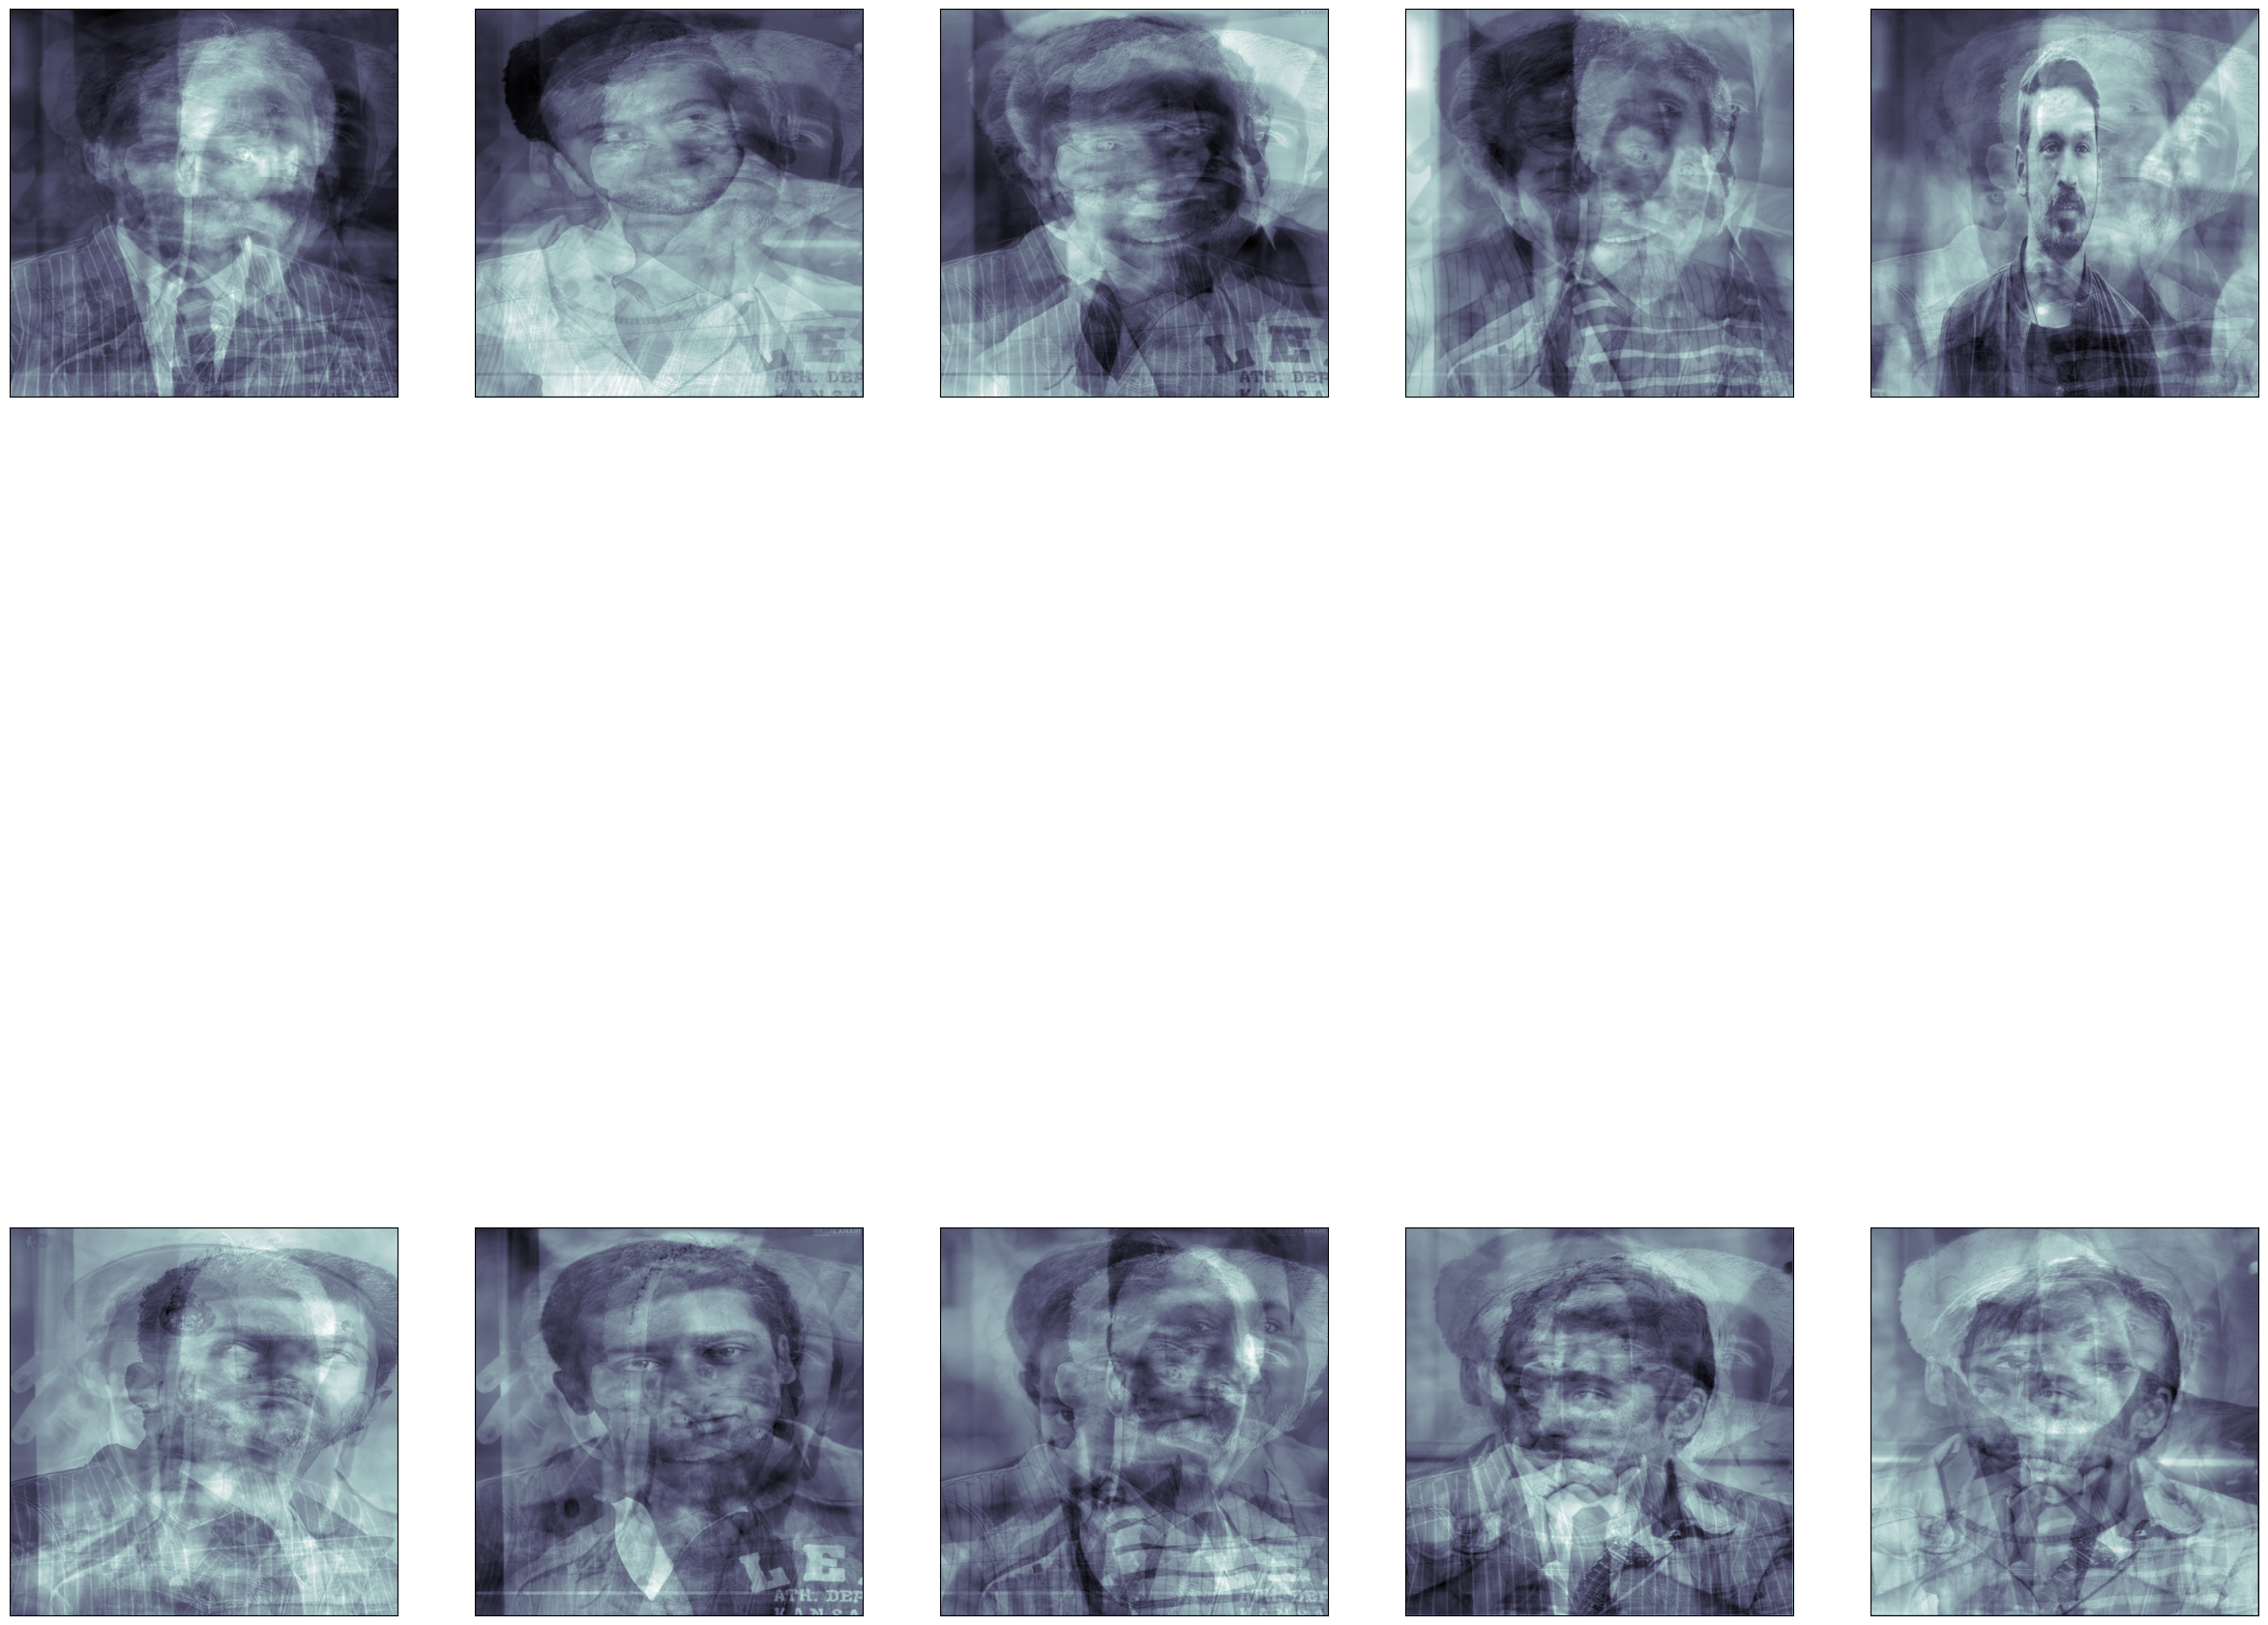

In [65]:
eigen=(np.reshape(x[10],(500,500)).astype(np.float64))
fig=py.figure(figsize=(30,30))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape),cmap=py.cm.bone)

In [66]:
from sklearn import svm
clf=svm.SVC(C=2,gamma=0.006,kernel='rbf')
clf.fit(x_train_pca,y_train)

SVC(C=2, gamma=0.006)

In [73]:
y_pred=clf.predict(x_test_pca)
y_pred

array(['dhanush', 'dhanush', 'dhanush', 'dhanush', 'dhanush', 'dhanush',
       'dhanush', 'dhanush', 'dhanush', 'dhanush', 'dhanush', 'dhanush',
       'dhanush', 'dhanush', 'dhanush'], dtype=object)

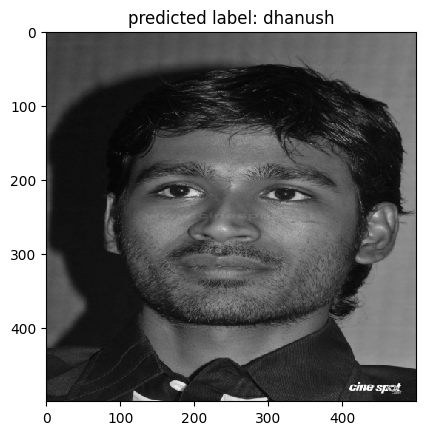

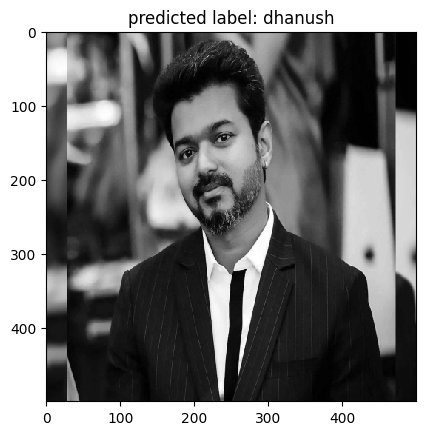

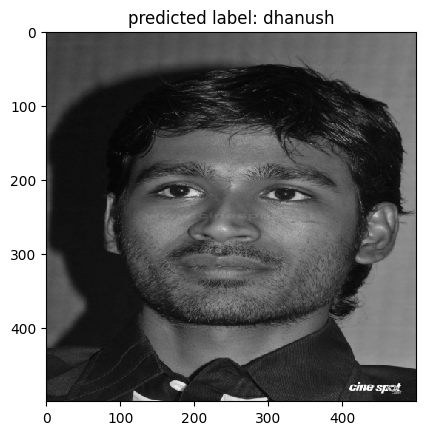

In [74]:
for i in (np.random.randint(0,3,3)):
    predicted_images=(np.reshape(x_test[i], (500,500)).astype(np.float64))
    py.title('predicted label: {0}'. format(y_pred[i]))
    py.imshow(predicted_images,interpolation='nearest',cmap='gray')
    py.show()